# Reto: Análisis de texto sobre ciencia de datos

En este ejemplo, hagamos un ejercicio simple que cubra todos los pasos de un proceso tradicional de ciencia de datos. No tiene que escribir ningún código, simplemente puede hacer clic en las celdas de abajo para ejecutarlas y observar el resultado. Como desafío, se le anima a probar este código con diferentes datos. 

## Objetivo

En esta lección, hemos estado discutiendo diferentes conceptos relacionados con la Ciencia de Datos. Intentemos descubrir conceptos más relacionados haciendo algo de **minería de texto**. Comenzaremos con un texto sobre Data Science, extraeremos palabras clave de él y luego intentaremos visualizar el resultado.

Como texto, usarémos la página que contiene un consepto genérico sobre Ciencia de Datos de Wikipedia:

In [4]:
url = 'https://en.wikipedia.org/wiki/Data_science'

En este enlace esta el rexto antes mencionado.

## Paso 1: Obtención de los datos

El primer paso en cada proceso de ciencia de datos es obtener los datos. Usaremos la biblioteca de 'solicitudes' para hacer eso:

In [5]:
pip install requests

Note: you may need to restart the kernel to use updated packages.


In [15]:
import requests

text = requests.get(url).content.decode('utf-8')
print(text[:1000])

<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-enabled vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-zebra-design-disabled vector-feature-custom-font-size-clientpref-disabled" lang="en" dir="ltr">
<head>
<meta charset="UTF-8">
<title>Data science - Wikipedia</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-enabled vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-zebra-design-disabled vector-feature-custom-

## Paso 2: Transformar los datos

El siguiente paso es convertir los datos en la forma adecuada para el procesamiento. En nuestro caso, hemos descargado el código fuente HTML de la página, y necesitamos convertirlo en texto plano.

Hay muchas maneras de hacer esto. Usaremos el incorporado más simple[HTMLParser](https://docs.python.org/3/library/html.parser.html) de Python. Necesitamos subclasificar el `HTMLParser` class y definir el código que recopilará todo el texto dentro de HTML, excepto las etiquetas `<script>` y `<style>`.

In [7]:
from html.parser import HTMLParser

class MyHTMLParser(HTMLParser):
    script = False
    res = ""
    def handle_starttag(self, tag, attrs):
        if tag.lower() in ["script","style"]:
            self.script = True
    def handle_endtag(self, tag):
        if tag.lower() in ["script","style"]:
            self.script = False
    def handle_data(self, data):
        if str.strip(data)=="" or self.script:
            return
        self.res += ' '+data.replace('[ edit ]','')

parser = MyHTMLParser()
parser.feed(text)
text = parser.res
print(text[:1000])

 Data science - Wikipedia Jump to content Main menu Main menu move to sidebar hide 
		Navigation
	 Main page Contents Current events Random article About Wikipedia Contact us Donate 
		Contribute
	 Help Learn to edit Community portal Recent changes Upload file Languages Language links are at the top of the page across from the title. Search Search Create account Log in Personal tools Create account Log in 
		Pages for logged out editors  learn more Contributions Talk Contents move to sidebar hide (Top) 1 Foundations Toggle Foundations subsection 1.1 Relationship to statistics 2 Etymology Toggle Etymology subsection 2.1 Early usage 2.2 Modern usage 3 Data Science and Data Analysis 4 History 5 See also 6 References Toggle the table of contents Toggle the table of contents Data science 46 languages العربية Azərbaycanca বাংলা Български Català Čeština Deutsch Eesti Ελληνικά Español Esperanto Euskara فارسی Français Galego 한국어 Հայերեն हिन्दी Bahasa Indonesia IsiZulu Italiano עברית ಕನ್ನಡ Қазақ

## Paso 3: Obtener información

El paso más importante es convertir nuestros datos en alguna forma de la que podamos extraer información. En nuestro caso, queremos extraer palabras clave del texto y ver qué palabras clave son más significativas.

Usaremos la biblioteca de Python llamada [RAKE] (https://github.com/aneesha/RAKE) para la extracción de palabras clave. Primero, instalemos esta biblioteca en caso de que no esté presente:

In [8]:
import sys
!{sys.executable} -m pip install nlp_rake

     ---------------------------------------- 0.0/981.5 kB ? eta -:--:--
     ------ ------------------------------- 174.1/981.5 kB 3.5 MB/s eta 0:00:01
     ----------------- -------------------- 440.3/981.5 kB 5.5 MB/s eta 0:00:01
     -------------------------------- ----- 849.9/981.5 kB 6.0 MB/s eta 0:00:01
     -------------------------------------- 981.5/981.5 kB 5.6 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
     ---------------------------------------- 0.0/62.7 kB ? eta -:--:--
     ---------------------------------------- 62.7/62.7 kB 3.5 MB/s eta 0:00:00
  Obtaining dependency information for regex>=2018.6.6 from https://files.pythonhosted.org/packages/de/cd/d80c9e284ae6c1b2172

La funcionalidad principal está disponible desde el objeto 'Rake', que podemos personalizar utilizando algunos parámetros. En nuestro caso, estableceremos la longitud mínima de una palabra clave en 5 caracteres, la frecuencia mínima de una palabra clave en el documento en 3 y el número máximo de palabras en una palabra clave, en 2. Siéntase libre de jugar con otros valores y observar el resultado.

In [9]:
import nlp_rake
extractor = nlp_rake.Rake(max_words=2,min_freq=3,min_chars=5)
res = extractor.apply(text)
res

[('data scientist', 4.0),
 ('data visualization', 4.0),
 ('machine learning', 4.0),
 ('data mining', 4.0),
 ('sexiest job', 4.0),
 ('21st century', 4.0),
 ('big data', 4.0),
 ('data scientists', 4.0),
 ('data science', 3.925373134328358),
 ('information science', 3.925373134328358),
 ('computer science', 3.925373134328358),
 ('statistical learning', 3.9),
 ('^ davenport', 3.8),
 ('data analysis', 3.75),
 ('science', 1.9253731343283582),
 ('analysis', 1.75),
 ('insights', 1.6666666666666667),
 ('field', 1.4285714285714286),
 ('computational', 1.25),
 ('statistics', 1.2173913043478262),
 ('thomas', 1.2),
 ('mathematics', 1.0),
 ('education', 1.0),
 ('communications', 1.0),
 ('archived', 1.0),
 ('original', 1.0),
 ('chikio', 1.0),
 ('forbes', 1.0)]


Se obtuvo una lista de términos junto con el grado de importancia asociado. Como ves, las disciplinas más relevantes, como el machine learning y el big data, están presentes en la lista en las primeras posiciones.

## Paso 4: Visualizar el resultado

Las personas pueden interpretar mejor los datos en forma visual. Por lo tanto, a menudo tiene sentido visualizar los datos para extraer algunas ideas. Podemos usar la biblioteca 'matplotlib' en Python para trazar la distribución simple de las palabras clave con su relevancia:

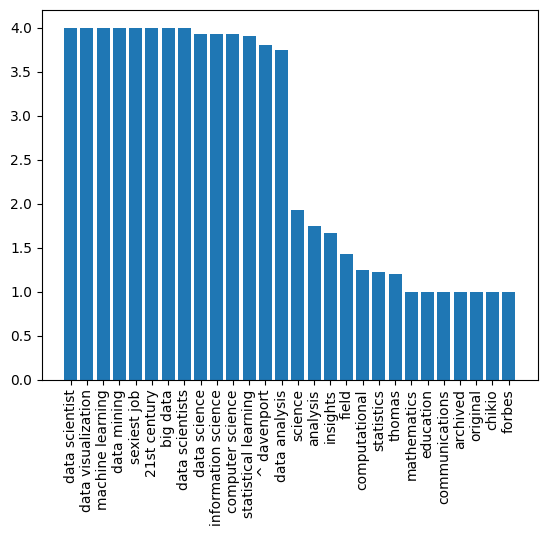

In [10]:
import matplotlib.pyplot as plt

def plot(pair_list):
    k,v = zip(*pair_list)
    plt.bar(range(len(k)),v)
    plt.xticks(range(len(k)),k,rotation='vertical')
    plt.show()

plot(res)

Sin embargo, hay una manera aún mejor de visualizar las frecuencias de las palabras: usando **Word Cloud**. Necesitaremos instalar otra biblioteca para trazar la nube de palabras de nuestra lista de palabras clave.

In [11]:
!{sys.executable} -m pip install wordcloud

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/34/ac/72a4e42e76bf549dfd91791a6b10a9832f046c1d48b5e778be9ec012aa47/wordcloud-1.9.2-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/151.4 kB ? eta -:--:--
   ----------------------------- ---------- 112.6/151.4 kB 2.2 MB/s eta 0:00:01
   ---------------------------------------- 151.4/151.4 kB 2.2 MB/s eta 0:00:00


El objeto 'WordCloud' es responsable de tomar texto original o una lista precalculada de palabras con sus frecuencias, retornos e imágenes, que luego se pueden mostrar usando 'matplotlib':

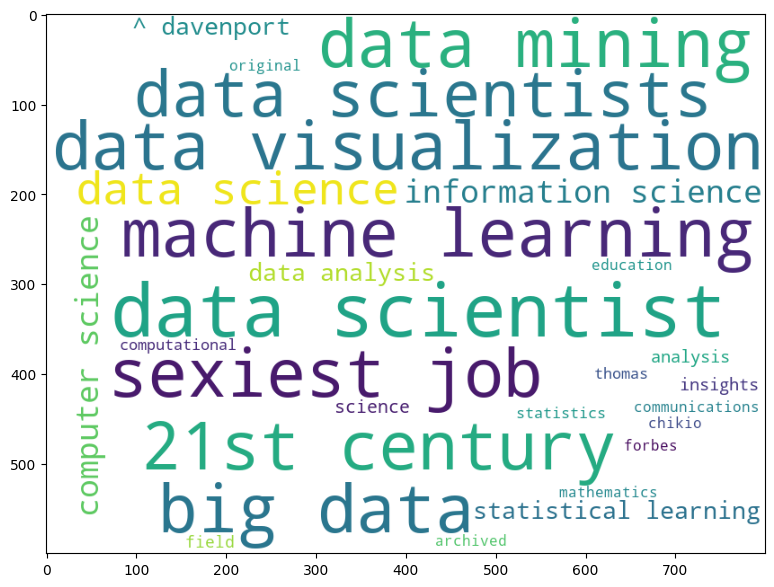

In [12]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(background_color='white',width=800,height=600)
plt.figure(figsize=(15,7))
plt.imshow(wc.generate_from_frequencies({ k:v for k,v in res }))

También podemos pasar el texto original a 'WordCloud' - veamos si somos capaces de obtener un resultado similar:

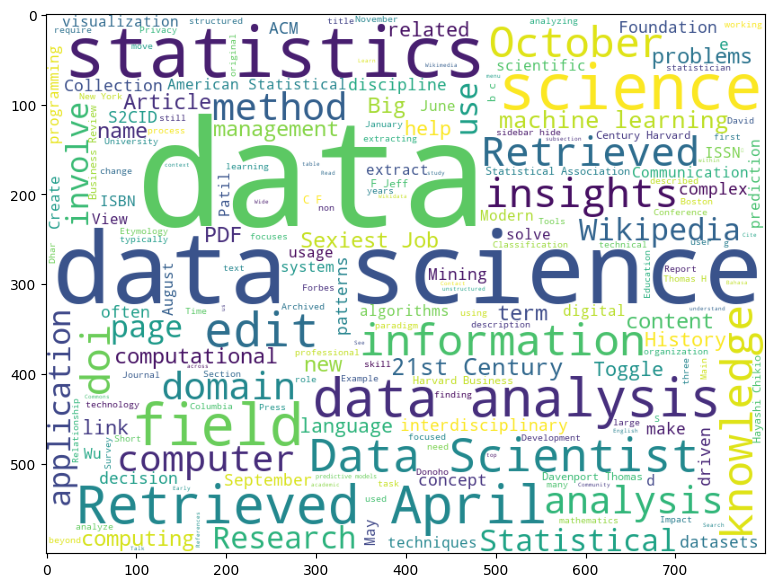

In [13]:
plt.figure(figsize=(15,7))
plt.imshow(wc.generate(text))

In [14]:
wc.generate(text).to_file('images/ds_wordcloud.png')

FileNotFoundError: [Errno 2] No such file or directory: 'images/ds_wordcloud.png'

Puede ver que la nube de palabras ahora se ve más impresionante, pero también contiene mucho ruido (por ejemplo, palabras no relacionadas como 'Recuperado el'). Además, obtenemos menos palabras clave que consisten en dos palabras, como *científico de datos* o *informática*. Esto se debe a que el algoritmo RAKE hace un trabajo mucho mejor al seleccionar buenas palabras clave del texto. Este ejemplo ilustra la importancia del preprocesamiento y la limpieza de datos, porque una imagen clara al final nos permitirá tomar mejores decisiones.

En este ejercicio hemos pasado por un proceso simple de extraer algún significado del texto de Wikipedia, en forma de palabras clave y nube de palabras. Este ejemplo es bastante simple, pero demuestra bien todos los pasos típicos que un científico de datos tomará cuando trabaje con datos, desde la adquisición de datos hasta la visualización.

En nuestro curso discutiremos todos esos pasos en detalle.